In [216]:
# -- Variables
RANDOM_STATE = 42

# -- Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# -- Load data
df_train = pd.read_csv('data/train.csv', sep = ',')  
df_test = pd.read_csv('data/test.csv', sep = ',')

# -- male,female -> 0,1
def NormalizeGender(X):
    X.loc[
        X['Sex']=='male',
        'Sex'
    ] = 0
    X.loc[
        X['Sex']=='female',
        'Sex'
    ] = 1
    X['Sex'] = X['Sex'].astype('bool')
NormalizeGender(df_train)
NormalizeGender(df_test)

df_train['Count'] = True; df_train['Count'].astype('bool')
df_test['Count'] = True; df_test['Count'].astype('bool')

df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,S,True
5,6,0,3,"Moran, Mr. James",False,NaN,0,0,330877,8.4583,NaN,Q,True
6,7,0,1,"McCarthy, Mr. Timothy J",False,54.0,0,0,17463,51.8625,E46,S,True
7,8,0,3,"Palsson, Master. Gosta Leonard",False,2.0,3,1,349909,21.0750,NaN,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",True,27.0,0,2,347742,11.1333,NaN,S,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",True,14.0,1,0,237736,30.0708,NaN,C,True


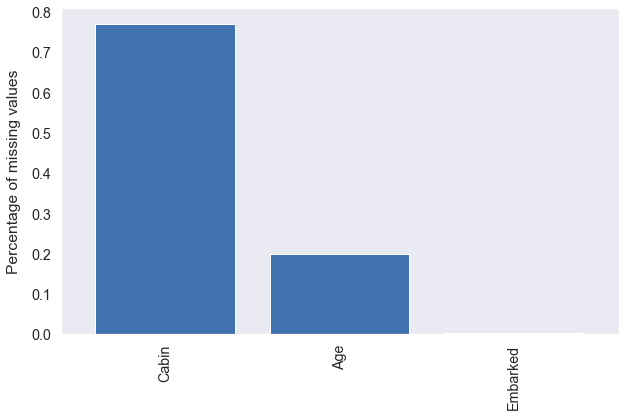

In [217]:
def CountNaN( X ):
    nans = X.isna().sum().sort_values(ascending=False) / X.shape[0]
    nans = nans[nans > 0]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid()
    ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
    ax.set_ylabel("Percentage of missing values", labelpad=10)
    ax.set_xlim(-0.6, len(nans) - 0.4)
    ax.xaxis.set_tick_params(rotation=90)
    plt.show()
# CountNaN( X )
CountNaN( df_train )

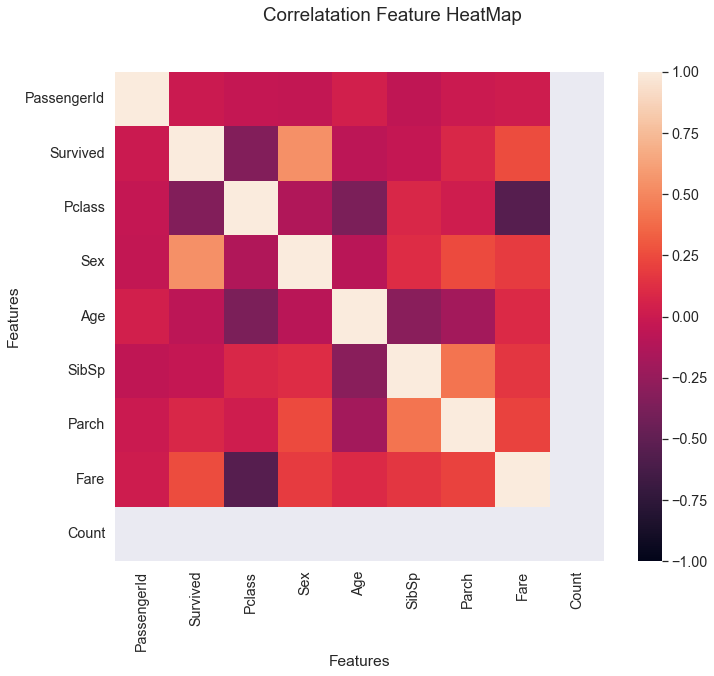

In [218]:
#correlation matrix
def PlotFeaturesCorrelation( df_train ):
    corr_mat = df_train.corr()
    f, ax = plt.subplots(figsize=(12, 9))

    sns.heatmap(corr_mat, vmax=1, vmin=-1, square=True)

    plt.suptitle("Correlatation Feature HeatMap")
    plt.xlabel("Features")
    plt.ylabel("Features")
PlotFeaturesCorrelation( df_train )

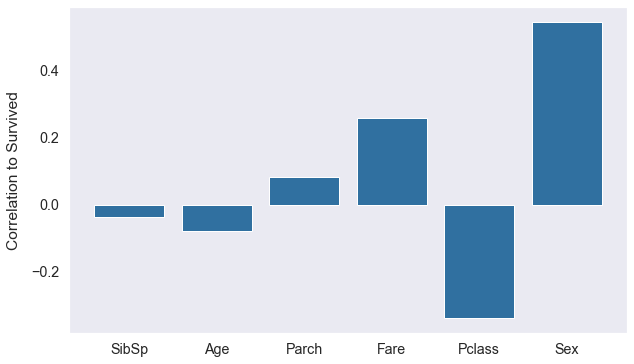

In [219]:
def PlotCorrelationToResult( df_train, y_name, drops=None, ascending=True ):
    if drops == None: 
        drops = []
    drops.append(y_name)
    correlations = df_train.corr()[y_name]
    correlations = correlations.drop( drops )
    correlations_sorted_indices = abs(correlations).sort_values(ascending=ascending).index
    correlations = correlations[correlations_sorted_indices]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(
        correlations.index, 
        correlations.values, 
        zorder=2, color="#3070a0"
    )
    ax.grid()
    ax.set_ylabel(f"Correlation to {y_name}", labelpad=10)
PlotCorrelationToResult( df_train, 'Survived', drops=['PassengerId', 'Count'] )

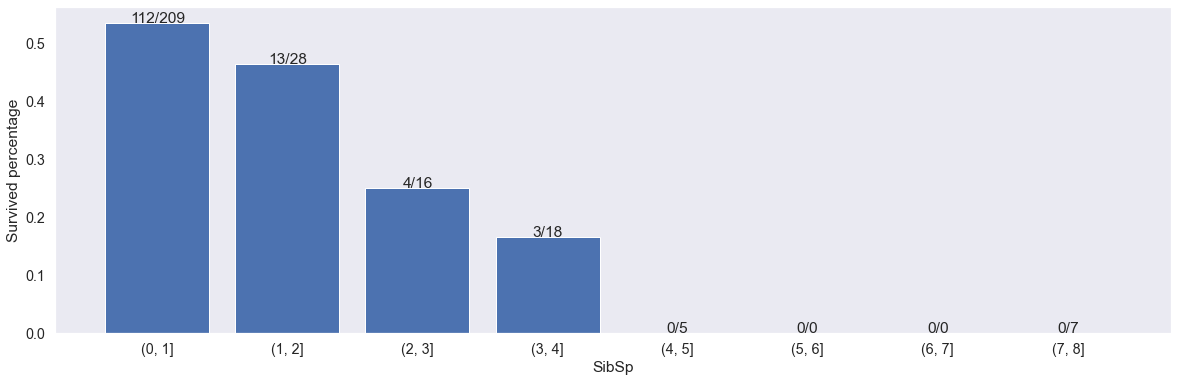

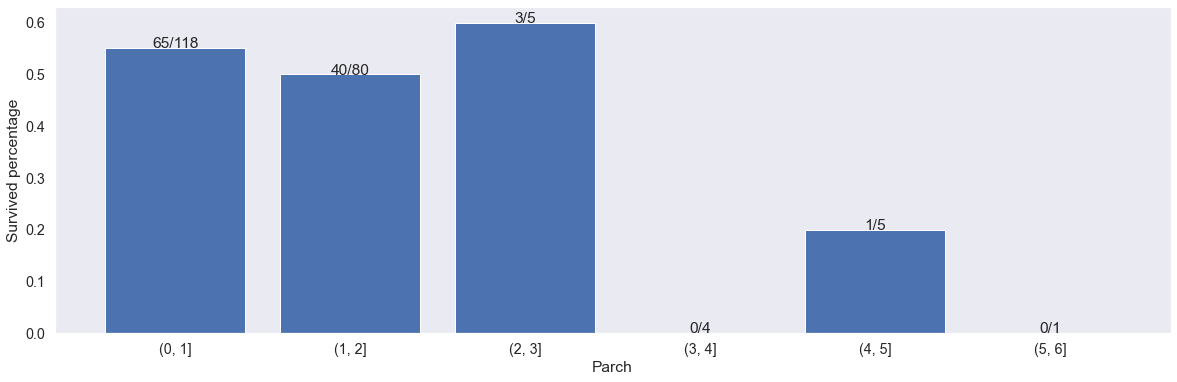

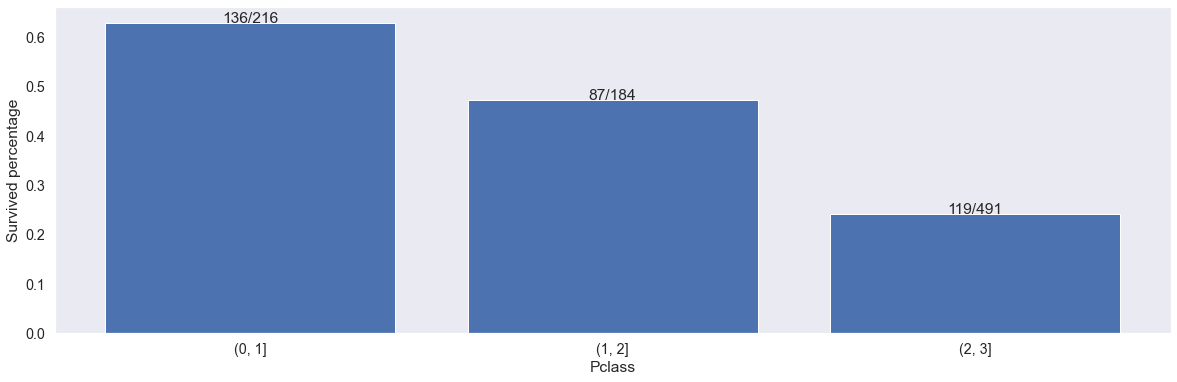

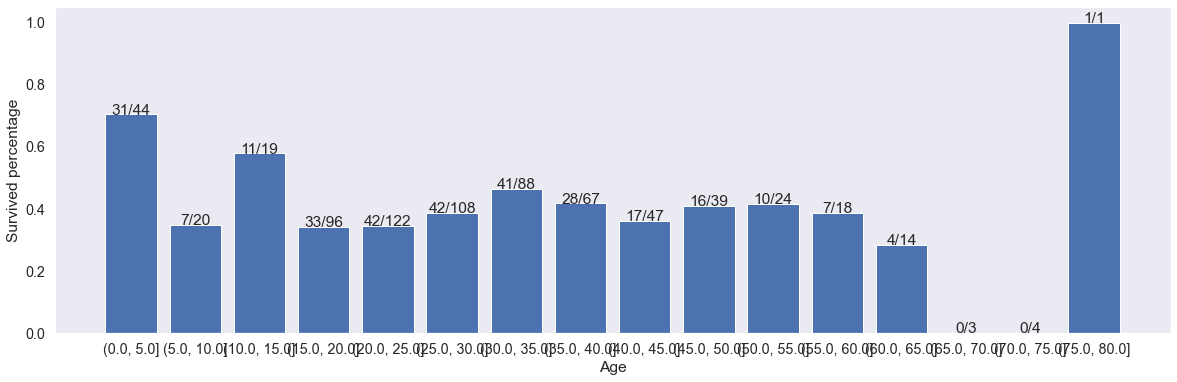

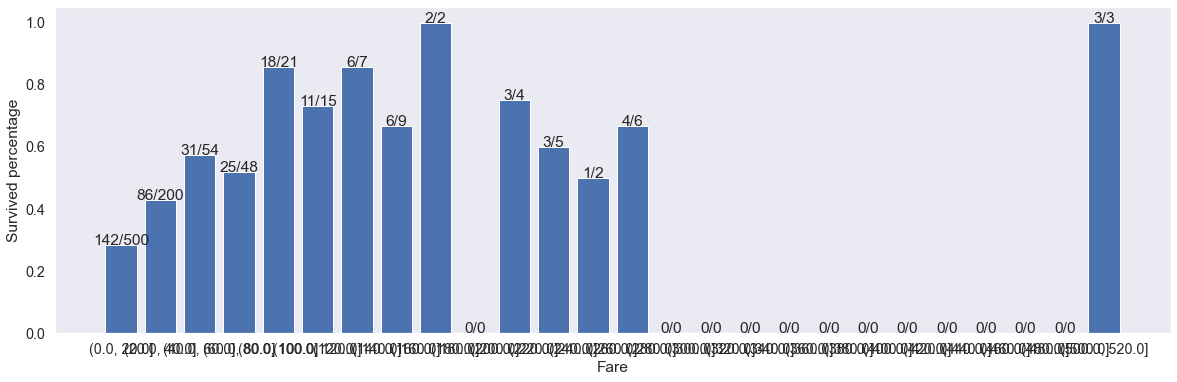

In [245]:
def addlabels(x,y,y_max, y_pos):
    for i in range(len(x)):
        plt.text(i, max(0,y_pos[i]), str(y[i])+'/'+str(y_max[i]), ha = 'center')
def PlotFeatureGroups( 
    X, feature_name, y_name, gap=1, 
    count_name='Count', figsize=(13,6), xlabel='', ylabel='' 
):
    Grouped = X.groupby(
            pd.cut(
                X[feature_name], np.arange(0, X[feature_name].max()+gap, gap)
            )
        ).sum()
    
    fig, ax = plt.subplots( figsize=figsize )
    ax.bar(
        range(Grouped[feature_name].shape[0]),
        Grouped[y_name] / Grouped[count_name],
    )
    ax.grid()
    plt.xlabel(feature_name)
    plt.xticks(
        range(Grouped[feature_name].shape[0]), 
        Grouped.index
    )
    addlabels(
        range(Grouped[feature_name].shape[0]),
        Grouped[y_name], Grouped[count_name],
        Grouped[y_name] / Grouped[count_name]
    )
    
    if xlabel != '':
        plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return Grouped
Grouped = PlotFeatureGroups( 
    df_train, 'SibSp', 'Survived', gap=1, 
    figsize=(20,6), ylabel='Survived percentage' 
)
Grouped = PlotFeatureGroups( 
    df_train, 'Parch', 'Survived', gap=1, 
    figsize=(20,6), ylabel='Survived percentage' 
)
Grouped = PlotFeatureGroups( 
    df_train, 'Pclass', 'Survived', gap=1, 
    figsize=(20,6), ylabel='Survived percentage' 
)
Grouped = PlotFeatureGroups( 
    df_train, 'Age', 'Survived', gap=5, 
    figsize=(20,6), ylabel='Survived percentage' 
)
Grouped = PlotFeatureGroups( 
    df_train, 'Fare', 'Survived', gap=20, 
    figsize=(20,6), ylabel='Survived percentage' 
)